# Solving the OLG model under the PAYG system

Importing packages and sets magic

In [233]:
from types import SimpleNamespace

from scipy import optimize
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import ipywidgets as widgets

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model description

In this project we examine the OLG model under a PAYG (Pay-as-you-go) system - which in short means that the young generation of workers is paying for a part of the older generations' consumption. The economy is as follows: 

The economy consists of a population which grows at an annual fixed rate $n$. In each period, there is a concentration of the population that works, $L$, and a concentration of people who doesn't work (who live off savings and contributions from the young generation). For instance let's assume that there is only 2 periods in the economy, after which the population dies. Then the population works in period $t$, and retires in period $t+1$ after which they will use their savings (as well as the new born young generations' contributions) from $t$ for consumption. 
Furthermore, the economy consists of identical firms, who all have Cobb-Douglas production functions, $Y=AK^{\alpha}_tL_t^{1-\alpha}$, with $K$ being capital and $L$ being labor. We assume full depreciation of capital and assume that the wage and interest rates are simply the marginal product of the respective factors.

The individuals in the economy all maximizes intertemporal utility in order to determine how much to consume and save. It's assumed that they all have the same utility function, 

$$ U = \ln c_{1t} + \beta \ln c_{2t+1} $$

Where $0<\Beta<1$ is a patience factor.

The individuals are all constrained by budget constraints. In the Pay-as-you-go system, the young generation contributes with an amount $d_t=\tau w_t$, where $\tau$ is a tax rate. Using this, the budget constraints (that each individual can't spend more than they have) becomes,

$$ c_{1t}+s_t =(1-\tau)w_t $$
$$ c_{2t+1} = (1+r_{t+1})s_t+(1+n)d_{t+1}$$

Hence, to sum it up, young agents in the economy try to maximize intertemporal utility by determining the optimal consumption and savings levels while they need to take into account that they need savings when they get old as well as the fact that they need to pay contributions to the old. 



## Analytical solution

In this section the OLG model under a PAYG system is found anatically. The optimal levels of the intertemporal consumption, savings and capital accumulation are displayed, as well as the steady-state level of capital. First, we import our model from our .py file

In [234]:
model = modelproject.OLGModel()
par = model.par

Next, we solve the utility maximization problem described above by finding the Euler equation (the optimal consumption path),

In [235]:
print('Utility Function:')
display(sp.Eq(sp.symbols('U'),model.utility()))
print('Euler:')
display(model.euler())



Utility Function:


Eq(U, log(c_1t) + log(c_{2t+1})/(rho + 1))

Euler:


Eq(c_1t, c_{2t+1}*(rho + 1)/(r_{t+1} + 1))

Where $c_{1t}$ and $c_{2t+1}$ in the Euler equation are the derivative of the utility function wrt. the respective variables. We now move on to find the optimal savings in this economy,

In [236]:
print('Optimal savings:')
display(sp.Eq(par.s_t,model.savings()))

Optimal savings:


Eq(s_t, (-n*rho*tau*w_{t+1} - n*tau*w_{t+1} + r_{t+1}*tau*w_t - r_{t+1}*w_t - rho*tau*w_{t+1} + tau*w_t - tau*w_{t+1} - w_t)/(rho*(r_{t+1} + 1)))

With the optimal savings in place, we can now move on to find the capital accumulation, and the steady state of this, 

In [237]:
print('Capital Accumulation:')
display(model.capitalaccum())
print('Steady State:')
display(model.steadystatecap())

Capital Accumulation:


Eq(k_{t+1}, A*k_t**alpha*(1 - alpha)*(1 - tau)/((1 + tau*(1 - alpha)*(rho + 1)/(alpha*(rho + 2)))*(n + 1)*(rho + 2)))

Steady State:


Eq(k^*, (A*(1 - alpha)*(1 - tau)/((1 + tau*(1 - alpha)*(rho + 1)/(alpha*(rho + 2)))*(n + 1)*(rho + 2)))**(1/(1 - alpha)))

## Graphical content

We can now try to plot our model for different values of the parameters. Let's start by examining how the capital accumulation evolves

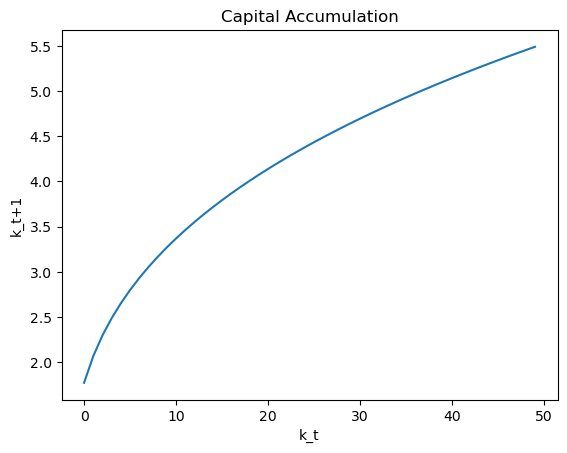

In [238]:
# defining parameter values

alpha = 1/3
rho = 0.2
n = 0.01
tau = 0.25
A = 10
k_t = np.linspace(1,30)

# determining capital accumulation

k_t1 = ((1 / (1 + (1+rho)/(2+rho)*((1-alpha)/alpha) * tau)))*(((1-alpha)*(1-tau))/((1+n)*(2+rho)))*(A * k_t**alpha)

# creating the plot

plt.plot(k_t1)
plt.title('Capital Accumulation')
plt.xlabel("k_t")
plt.ylabel("k_t+1")
plt.show()




And now for different values of rho

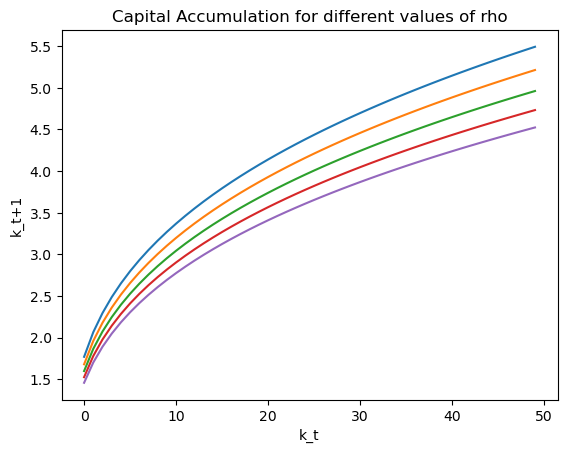

In [239]:
# defining parameter values, now with multiple values of rho

alpha = 1/3
rho1 = 0.2
rho2 = 0.3
rho3 = 0.4
rho4 = 0.5
rho5 = 0.6
n = 0.01
tau = 0.25
A = 10
k_t = np.linspace(1,30)

# likewise multiple capital accumulation formula has been determined

k_t1_1 = ((1 / (1 + (1+rho1)/(2+rho1)*((1-alpha)/alpha) * tau)))*(((1-alpha)*(1-tau))/((1+n)*(2+rho1)))*(A * k_t**alpha)
k_t1_2 = ((1 / (1 + (1+rho2)/(2+rho2)*((1-alpha)/alpha) * tau)))*(((1-alpha)*(1-tau))/((1+n)*(2+rho2)))*(A * k_t**alpha)
k_t1_3 = ((1 / (1 + (1+rho3)/(2+rho3)*((1-alpha)/alpha) * tau)))*(((1-alpha)*(1-tau))/((1+n)*(2+rho3)))*(A * k_t**alpha)
k_t1_4 = ((1 / (1 + (1+rho4)/(2+rho4)*((1-alpha)/alpha) * tau)))*(((1-alpha)*(1-tau))/((1+n)*(2+rho4)))*(A * k_t**alpha)
k_t1_5 = ((1 / (1 + (1+rho5)/(2+rho5)*((1-alpha)/alpha) * tau)))*(((1-alpha)*(1-tau))/((1+n)*(2+rho5)))*(A * k_t**alpha)

# plotting the 5 plots

plt.plot(k_t1_1)
plt.plot(k_t1_2)
plt.plot(k_t1_3)
plt.plot(k_t1_4)
plt.plot(k_t1_5)
plt.title('Capital Accumulation for different values of rho')
plt.xlabel("k_t")
plt.ylabel("k_t+1")
plt.show()




As expected, it can be concluded that the more patient households are, the greater is the capital accumulation, as they are willing to save more in each period. 

Below, a interactive graph have been inserted, which allows for different parameters to be changed

In [264]:
# Defining parameter values

alpha = 1/3
rho = 0.2
n = 0.01
tau = 0.25
A = 10
k_t = np.linspace(1,30)

# Defining plot

def interactiveplot(rho, alpha, tau, n, A):
        k_t1 = ((1 / (1 + (1+rho)/(2+rho)*((1-alpha)/alpha) * tau)))*(((1-alpha)*(1-tau))/((1+n)*(2+rho)))*(A * k_t**alpha)
        plt.plot(k_t1)
        plt.title('Capital Accumulation')
        plt.xlabel("k_t")
        plt.ylabel("k_t+1")
        plt.show()

# creating an interactive widget slider 

widgets.interact(
        interactiveplot, 
        A = widgets.FloatSlider(description="A", min=0, max=30, step=0.01, value=0),  
        alpha = widgets.FloatSlider(description="alpha", min=0.01, max=0.99, step=0.01, value=0),
        rho = widgets.FloatSlider(description="rho", min=0, max=0.99, step=0.01, value=0),
        n = widgets.FloatSlider(description="n", min=-0.99, max=0.99, step=0.01, value=0),    
        tau = widgets.FloatSlider(description="tau", min=0, max=0.99, step=0.01, value=0)
)

interactive(children=(FloatSlider(value=0.0, description='rho', max=0.99, step=0.01), FloatSlider(value=0.01, …

<function __main__.interactiveplot(rho, alpha, tau, n, A)>

# Conclusion

So, to sum up, this short project looked at how capital accumulation changes when parameters change and find that cap. acc. of course increases when tax rates decrease, when the technological levels rises or when young agents save more (for instance due to their level of patience). This of course also spills over to the steady state level of capital, such that for a lower tax rate the steady state level is higher and vice versa.